## Statistic for Data Science with Python: Peer-graded Assignment
### Housing Statistics in Boston,MA

#### Import Libraties

In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

##

## Task 1: Become familiar with the dataset

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df = boston_df.set_index('Unnamed: 0')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Unnamed: 0,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
print('Shape of df:',boston_df.shape)
print()
print('Describe df:\n',boston_df.describe())

Shape of df: (506, 13)

Describe df:
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12

## 

## Task 2: Generate Descriptive Statistics and Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

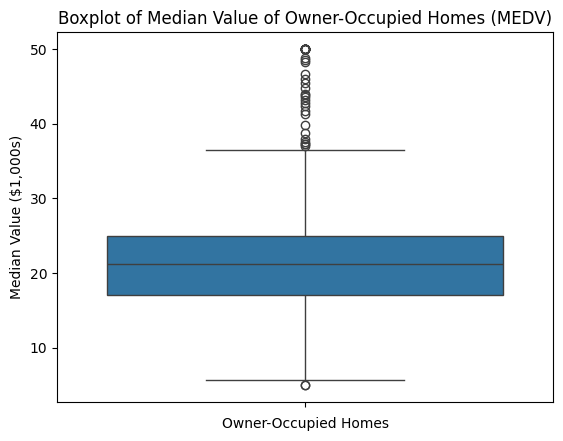

In [8]:
# Box plot of Median value of owner-occupied homes (MEDV)
medv_bp = sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Owner-Occupied Homes')
plt.ylabel('Median Value ($1,000s)')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

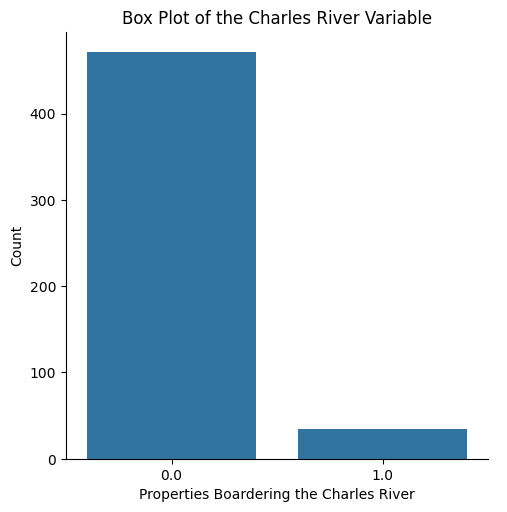

In [9]:
# Bar plot of Charles river vaviable
chas_bp = sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title('Box Plot of the Charles River Variable')
plt.xlabel('Properties Boardering the Charles River')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

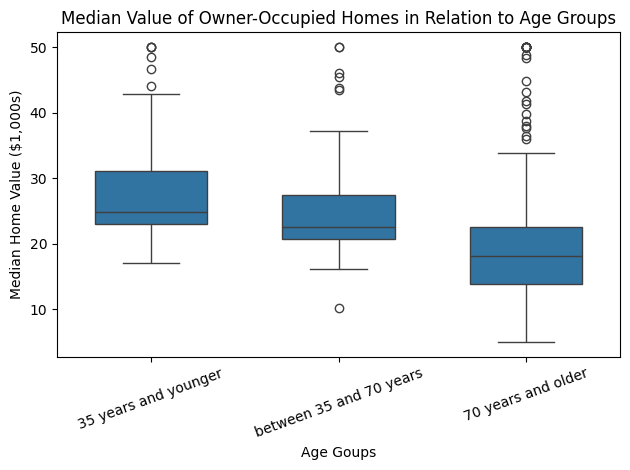

In [10]:
# Box plot of MEDV variable vs AGE, descretized into three age variable groups
boston_df.loc[(boston_df['AGE'] <=35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >=70), 'age_group'] = '70 years and older'

age_group_order = ['35 years and younger', 'between 35 and 70 years', '70 years and older']

sns.boxplot(x='age_group', y='MEDV', data=boston_df, order=age_group_order, width=.6)
plt.title('Median Value of Owner-Occupied Homes in Relation to Age Groups')
plt.xlabel('Age Goups')
plt.xticks(rotation=20)
plt.ylabel('Median Home Value ($1,000s)')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

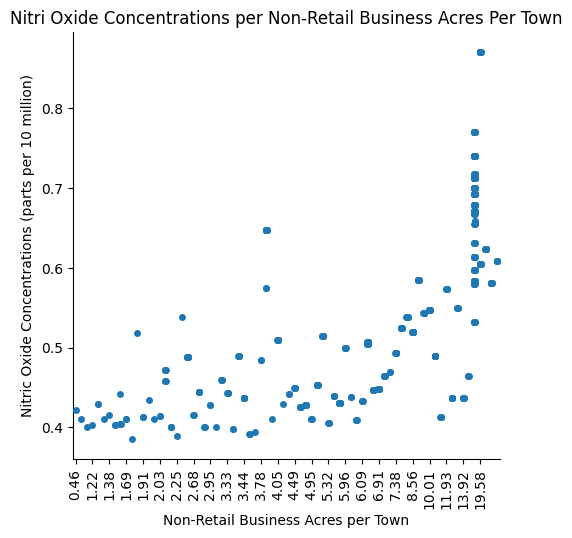

In [11]:
# Scatter plot showing the relationship betwee Nitric oxide concentrations and proportion of non-retail business acres per town
sns.catplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Nitri Oxide Concentrations per Non-Retail Business Acres Per Town')
plt.xlabel('Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.xticks(rotation=90)
plt.xticks(range(0, 75, 3))
plt.show

#### Conclusions: The industrial areas of towns have a positive exponential relation ship with nitric oxide concentrations.

[Text(0.5, 1.0, 'Student to Teacher Ratio'),
 Text(0.5, 0, 'Normal Distribution'),
 Text(0, 0.5, 'Frequency')]

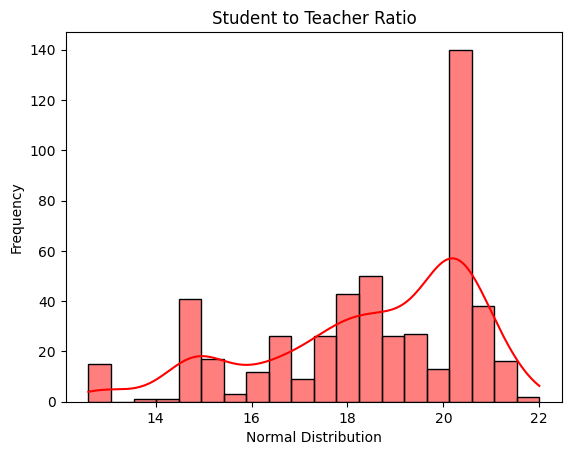

In [12]:
# Histogram of pupil to teacher reatio
hist_plot = sns.histplot(boston_df['PTRATIO'], bins=20, kde=True, color='red')

hist_plot.set(title='Student to Teacher Ratio', xlabel='Normal Distribution', ylabel='Frequency')

##

## Task 3: Use the appropriate tests to answer the questions provided

#### Question 1: Is there a significant difference in the median value of houses bounded by the charles river or not?
##### Hypothesis:
##### H_0: There is no difference in the median values of houses bounded by the Charles river.
##### H_1: There is a difference in the median values of houses bounded by the Charles river.
###### α = 0.05

In [13]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0.0]['MEDV'], 
                      equal_var=True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

##### Conclusion: With the p-value being 7.39e-05, it is less than the alpha value of 0.05, meaning that there is a signifigant difference between median value of houses bounded by the charles river compare to those that are not.

--------------------------------------------------------

#### Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
##### Hypothesis:
##### H_0: There is no difference in the median values of houses for each proportion of owner occupied units built prior to 1940.
##### H_1: There is a difference in the median values of houses in at least one proportion of owner occupied units built prior to 1940.
###### α = 0.05

In [14]:
#Separate the sample sets into variables
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seven = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seven_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

#Test using ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seven, seven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


##### Conclusion: The p-value is less than 0.05 thus the null hypothesis is rejected and there ius a coorelation between the median values of houses in atleast one of the owner occupied units ranges.

----

#### Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
##### Hypothesis:
##### H_0: There is no relationship betwee Nitric oxide concentrations and proportion of non-retail business acres per town.
##### H_1: There is a relationship betwee Nitric oxide concentrations and proportion of non-retail business acres per town.
###### α = 0.05

In [16]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

##### Conclusion: The p-value is less than 0.05, thus the null hypothesis is rejected and there is a relationship between Nitric Oxide concentrations and the amount of non-retail business acres per town.

-----

#### Question 4: What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes?
##### Hypothesis:
##### H_0: There is no difference in additional weighted distance to the five Boston employment centers to the median value of owner-occupied homes.
##### H_1: There is a difference
###### α = 0.05

In [17]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        18:53:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Conclusion: The p-value is <0.05, so there is impact of additional weighted distance to the employment centers on the median value of owner-occupied homes.